# Parkway Project

### Load Data

#### Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

#### Read data from file

In [3]:
filePath = '.\data\ParkwaySampleDataForProject_05.xlsx'
#filePath = '.\data\ParkwaySampleDataForProject_06.xlsx'
df = pd.read_excel(filePath)
display(df.shape)

(381212, 82)

### Exploratory Data Analysis

#### Explore data

In [4]:
info = []
for col in df.columns:
    non_null  = len(df) - np.sum(pd.isna(df[col]))
    num_unique = df[col].nunique()
    col_type = str(df[col].dtype)

    info.append([col, non_null, num_unique, col_type])

features_info = pd.DataFrame(info, columns = ['colName','non-null values', 'unique', 'dtype'])

display(features_info)
#features_info.to_csv('Info_List.csv')

,colName,non-null values,unique,dtype
0,INSTITUTION,381212,4,object
1,CASE_NUMBER,381212,381211,int64
2,TOTAL_PAID_AMT,381212,326926,float64
3,PAYER_CODE_1,381212,482,object
4,PAYER_NAME_1,381212,425,object
5,PAYER_1_PAID_AMT,381212,308364,float64
6,PAYER_CODE_2,149323,378,object
7,PAYER_NAME_2,149323,329,object
8,PAYER_2_PAID_AMT,381212,117070,float64
9,PAYER_CODE_3,53210,230,object


In [5]:
# drop columns
col_drop = ['PAYER_NAME_1', 'PAYER_NAME_2', 'PAYER_NAME_3', 'PAYER_NAME_4', 'PAYER_NAME_5', 'DISCHARGE_TYPE_DESC', 'DOCTOR_NAME', 'SPECIALTY_DESC',
            'TOSP_STRING', 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', 'DRG_DESC', 'PAYER_CODE1_V', 'PAYER_NAME1_V', 'PAYER_CODE2_V',
            'PAYER_NAME2_V', 'PAYER_CODE3_V', 'PAYER_NAME3_V', 'PAYER_CODE4_V', 'PAYER_NAME4_V', 'PACKAGE_DESC', 'PACKAGE_DESC1', 'PACKAGE_DESC2',
            'ICDCODE_STRING']
df1 =  df.drop(col_drop, axis=1)

# convert dates
col_dt = df1.select_dtypes(include=np.datetime64).columns
for col in col_dt:
    df1[col+'_year'] = df1[col].dt.year
    df1[col+'_month'] = df1[col].dt.month
    df1[col+'_day'] = df1[col].dt.day
df1 =  df1.drop(col_dt, axis=1)

# convert objects to factors
col_obj = df1.select_dtypes(include=np.object).columns
for col in col_obj:
    df1[col] = pd.factorize(df1[col])[0] +1

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381212 entries, 0 to 381211
Data columns (total 62 columns):
INSTITUTION            381212 non-null int64
CASE_NUMBER            381212 non-null int64
TOTAL_PAID_AMT         381212 non-null float64
PAYER_CODE_1           381212 non-null int64
PAYER_1_PAID_AMT       381212 non-null float64
PAYER_CODE_2           381212 non-null int64
PAYER_2_PAID_AMT       381212 non-null float64
PAYER_CODE_3           381212 non-null int64
PAYER_3_PAID_AMT       381212 non-null float64
PAYER_CODE_4           381212 non-null int64
PAYER_4_PAID_AMT       381212 non-null float64
PAYER_CODE_5           381212 non-null int64
PAYER_5_PAID_AMT       381212 non-null float64
CASE_TYPE              381212 non-null int64
BED_TYPE               381212 non-null int64
REFERRAL_TYPE          381212 non-null int64
TREATMENT_CATEGORY     381212 non-null int64
ADMISSION_TYPE         381212 non-null int64
DISCHARGE_TYPE         381212 non-null int64
LOS_DAYS              

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

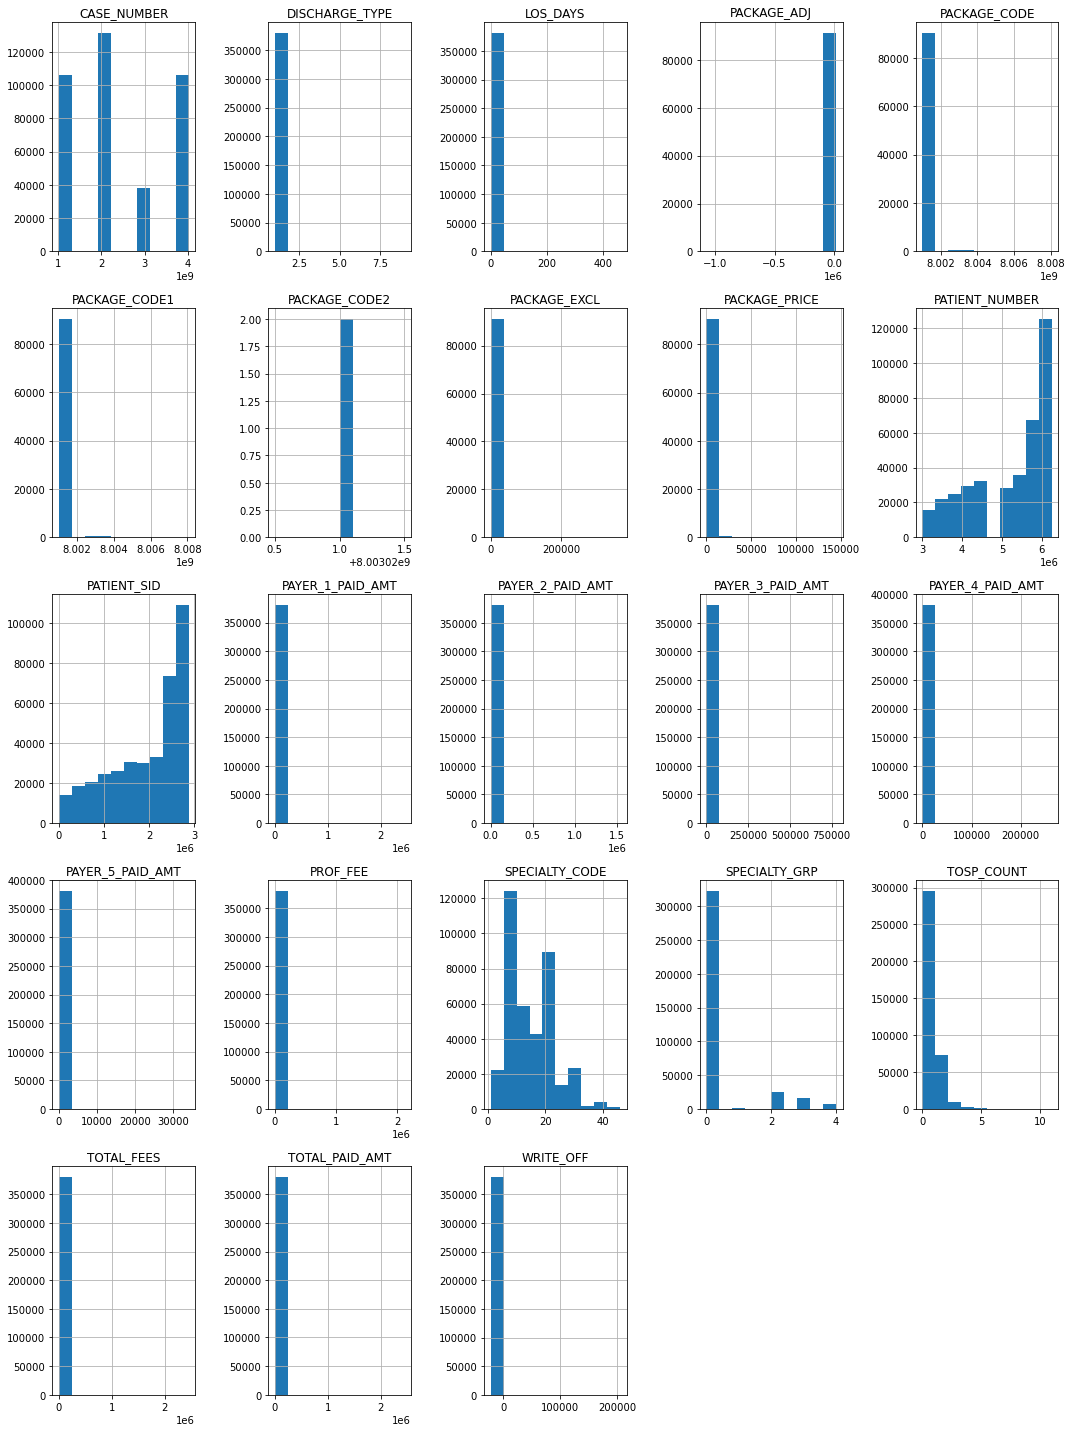

In [6]:
df.hist(figsize=(15,20), layout=(-1,5))
plt.tight_layout()
plt.show()

In [24]:
#writeoff, totalfee groupby country
for col in df.select_dtypes(include=np.object).columns:
    print(col)
    display(df[col].value_counts())

INSTITUTION


MEH    131061
GHL    106229
PNH    105784
PEH     38138
Name: INSTITUTION, dtype: int64

PAYER_CODE_1


              200129
0002008111     35329
0002000000     32942
0002008170     25117
0002008113     23374
0002008114     13505
0002008112      9684
0002008783      5633
0002100073      3006
0002000166      2465
0002100972      2071
0002101171      1828
0002100009      1470
0002101218      1446
0002007089       971
0002000088       860
I8303000         749
0002007915       739
0002101512       734
0002100330       700
0002001581       645
0002006870       585
0002000086       565
0002101217       491
I8388E01         471
0002008784       469
0002000323       444
I8388608         439
0002100300       424
0002001924       413
I8388E02         398
0002002275       379
0002100837       374
0002000502       365
0002002755       346
0002101017       344
0002008937       318
0002101008       303
0002002808       299
0002101430       284
0002002557       266
0002006808       256
0002100634       244
0002002227       242
0002003096       242
0002101332       238
I8388E06         237
0002001371   

PAYER_NAME_1


Self-Paid                              200129
AIA - HEALTHSHIELD GOLD                 35329
MEDISAVE                                32942
PRUDENTIAL - PRUSHIELD                  25117
GREAT EASTERN LIFE ASSURANCE CO LTD     23542
NTUC INCOME - INCOMESHIELD              13505
AVIVA LTD - MYSHIELD                     9684
CIGNA INTERNATIONAL                      6145
CHANGI GENERAL HOSPITAL                  3006
BUPA INSURANCE SERVICES LTD              2465
AETNA INSURANCE COMPANY LIMITED          2170
FWD SINGAPORE PTE LTD                    1937
AXA INSURANCE PTE LTD(SHIELD PLANS)      1828
AIA SINGAPORE PTE LTD                    1770
ALLIANZ WORLDWIDE CARE LTD                971
AXA INSURANCE PTE LTD (HEALTH             860
NIPPON MEDICAL CARE PTE LTD               749
HENNER-GMC UG32                           739
CIGNA GLOBAL HEALTH BENEFITS (CGHB)       734
ADEPT HEALTH PTE LTD                      700
AVIVA LTD                                 645
INTERNATIONAL SOS PTE LTD         

PAYER_CODE_2


0002000000    86046
0002008114    12384
0002008111     6484
0002100009     5143
0002001581     4035
0002008113     3487
0002008170     3448
0002000001     3329
0002008112     3073
0002101217     2545
0002008783     1602
0002001477     1448
0002003096     1416
0002000088      999
0002000166      986
0002100634      956
0002100330      852
0002101218      764
0002100972      576
0002008784      542
0002101430      523
0002006254      451
0002000086      387
0002101189      385
0002002755      384
0002002557      357
0002007089      304
0002007915      252
0002003108      246
0002101512      244
0002101008      231
0002008937      227
0002101070      222
0002101171      213
0002100044      185
0002101017      163
0002101159      161
0002001966      155
I8388608        153
0002101650      133
0002101295      132
0002100300      118
0002100655      116
0002008692      115
0002002532      108
0002101677      105
0002008560      101
0002008259       90
0002006870       88
0002007505       87


PAYER_NAME_2


MEDISAVE                               86046
NTUC INCOME - INCOMESHIELD             12384
AIA - HEALTHSHIELD GOLD                 6484
AIA SINGAPORE PTE LTD                   5689
GREAT EASTERN LIFE ASSURANCE CO LTD     4942
AVIVA LTD                               4035
PRUDENTIAL - PRUSHIELD                  3448
MEDISHIELD                              3329
FWD SINGAPORE PTE LTD                   3309
AVIVA LTD - MYSHIELD                    3073
CIGNA INTERNATIONAL                     2188
TOKIO MARINE LIFE INSURANCE             1416
AXA INSURANCE PTE LTD (HEALTH            999
BUPA INSURANCE SERVICES LTD              986
AXA INSURANCE PTE LTD (EMPLOYEES         956
ADEPT HEALTH PTE LTD                     852
AETNA INSURANCE COMPANY LIMITED          625
PRUDENTIAL ASSURANCE CO SINGAPORE        451
IPA SINGAPORE PTE LTD                    387
PT. AA INTERNATIONAL INDONESIA           385
CIGNA LIFE INSURANCE COMPANY             384
ULINK ASSIST PTE LTD                     357
ALLIANZ WO

PAYER_CODE_3


0002000001    11655
0002008114    11215
0002008111     9281
0002008113     4786
0002008170     4199
0002008112     3927
0002100009     1989
0002101217     1535
0002001581      859
0002100634      376
0002003096      364
0002101218      354
0002001477      347
0002101171      318
0002000088      198
0002100330      181
0002101650      127
0002101430      120
I8388608        113
0002008783      103
0002006254       92
0002008259       82
0002100972       62
0002002755       48
0002001966       44
0002008784       39
0002000166       37
0002101512       35
0002000086       32
0002005088       32
0002002532       26
0002007915       25
0002100144       22
0002006893       20
0002101231       19
0002006808       17
0002008857       16
0002008692       16
0002007505       15
0002008669       15
0002101295       15
0002100044       13
0002101017       12
0002101518       12
0002101008       12
0002101159       11
0002100036       11
0002002336       10
0002101501       10
0002101677       10


PAYER_NAME_3


MEDISHIELD                             11655
NTUC INCOME - INCOMESHIELD             11215
AIA - HEALTHSHIELD GOLD                 9281
GREAT EASTERN LIFE ASSURANCE CO LTD     5137
PRUDENTIAL - PRUSHIELD                  4199
AVIVA LTD - MYSHIELD                    3927
AIA SINGAPORE PTE LTD                   2109
FWD SINGAPORE PTE LTD                   1889
AVIVA LTD                                859
AXA INSURANCE PTE LTD (EMPLOYEES         376
TOKIO MARINE LIFE INSURANCE              364
AXA INSURANCE PTE LTD(SHIELD PLANS)      318
AXA INSURANCE PTE LTD (HEALTH            198
ADEPT HEALTH PTE LTD                     181
CIGNA INTERNATIONAL                      142
AIA SINGAPORE PTE LTD CORP SOLUTION      127
PARKWAY SHENTON PTE LTD                  121
PRUDENTIAL ASSURANCE CO SINGAPORE         92
RAFFLES HEALTH INSURANCE PTE LTD          82
AETNA INSURANCE COMPANY LIMITED           65
CIGNA LIFE INSURANCE COMPANY              48
PANASIA SURGERY PTE LTD                   45
NTUC INCOM

PAYER_CODE_4


0002100009    531
0002008114    276
0002101217    231
0002008111    147
0002001581    123
0002101218    106
0002008170    102
0002100634     99
0002008113     98
0002008112     84
0002100330     63
0002001477     57
0002003096     55
0002008259     45
I8388608       44
0002000088     35
0002101430     32
0002101650     31
0002006254     30
0002101171     16
0002005088      9
0002006893      9
0002000166      8
0002100972      8
0002001966      7
0002101512      6
0002100655      6
0002002532      5
0002002755      5
0002007686      5
0002008692      4
0002008857      4
0002101359      4
0002101231      4
0002008783      3
0002101534      3
0002008784      3
0002008711      3
0002008025      3
0002101677      3
I8388609        2
0002003108      2
0002007505      2
0002100025      2
0002000086      2
0002100044      2
0002100036      2
0002002557      2
0002100042      2
0002008713      2
0002000188      2
0002001371      2
I8168012        2
0002101159      2
0002101134      1
0002006808

PAYER_NAME_4


AIA SINGAPORE PTE LTD                  566
FWD SINGAPORE PTE LTD                  337
NTUC INCOME - INCOMESHIELD             276
GREAT EASTERN LIFE ASSURANCE CO LTD    156
AIA - HEALTHSHIELD GOLD                147
AVIVA LTD                              123
PRUDENTIAL - PRUSHIELD                 102
AXA INSURANCE PTE LTD (EMPLOYEES        99
AVIVA LTD - MYSHIELD                    84
ADEPT HEALTH PTE LTD                    63
TOKIO MARINE LIFE INSURANCE             55
PARKWAY SHENTON PTE LTD                 47
RAFFLES HEALTH INSURANCE PTE LTD        45
AXA INSURANCE PTE LTD (HEALTH           35
AIA SINGAPORE PTE LTD CORP SOLUTION     31
PRUDENTIAL ASSURANCE CO SINGAPORE       30
AXA INSURANCE PTE LTD(SHIELD PLANS)     16
AVIVA LIMITED                            9
QBE INSURANCE (SINGAPORE) PTE LTD        9
AETNA INSURANCE COMPANY LIMITED          8
BUPA INSURANCE SERVICES LTD              8
NTUC INCOME INSURANCE CO-OP  LTD         7
CIGNA INTERNATIONAL                      7
CIGNA GLOBA

PAYER_CODE_5


0002100634    9
0002101650    6
0002003096    4
0002008113    4
0002008111    4
0002101217    3
0002008170    3
0002100009    3
0002008259    2
I8388609      2
0002101218    2
0002008114    1
I8388608      1
0002101171    1
0002101430    1
0002101024    1
0002008857    1
0002008756    1
0002002755    1
0002008537    1
0002100330    1
Name: PAYER_CODE_5, dtype: int64

PAYER_NAME_5


AXA INSURANCE PTE LTD (EMPLOYEES       9
AIA SINGAPORE PTE LTD CORP SOLUTION    6
FWD SINGAPORE PTE LTD                  5
GREAT EASTERN LIFE ASSURANCE CO LTD    4
AIA - HEALTHSHIELD GOLD                4
TOKIO MARINE LIFE INSURANCE            4
AIA SINGAPORE PTE LTD                  4
PRUDENTIAL - PRUSHIELD                 3
PARKWAY SHENTON PTE LTD                3
RAFFLES HEALTH INSURANCE PTE LTD       2
CIGNA - PROVIDER CLAIMS                1
EURO-CENTER (THAILAND) CO. LTD         1
MSIG INSURANCE (SINGAPORE) PTE LTD     1
AXA INSURANCE PTE LTD(SHIELD PLANS)    1
NTUC INCOME - INCOMESHIELD             1
ADEPT HEALTH PTE LTD                   1
HEALTHWAY MEDICAL GROUP PTE LTD        1
CIGNA LIFE INSURANCE COMPANY           1
Name: PAYER_NAME_5, dtype: int64

CASE_TYPE


INPATIENT    381212
Name: CASE_TYPE, dtype: int64

BED_TYPE


DC           151735
SGL          106634
2BD           48064
4BD           31532
CLASS A       15987
NURSP         11743
ABOVE SGL      6723
ICU/HDU        3175
MOH            3049
NICU           2570
Name: BED_TYPE, dtype: int64

REFERRAL_TYPE


MC    312709
AE     40586
HR     14767
OH      3546
OC      3096
AB      2665
CC      1706
ZS       420
MR       406
SM       387
MS       199
MA       184
ZI       110
ZC        69
MW        51
CM        43
M         37
OR        34
M2        34
AM        23
ZN        20
PU        17
OO        13
M1        13
HS        10
UL         8
AH         8
SP         7
PS         5
ES         4
CA         3
RI         3
VS         2
ZG         2
PH         2
ZP         2
EV         2
CU         2
PC         2
BK         1
RC         1
ZO         1
CD         1
DC         1
ZA         1
C1         1
CW         1
WC         1
CN         1
OE         1
Name: REFERRAL_TYPE, dtype: int64

TREATMENT_CATEGORY


SGL       100080
ENDO       73121
2BD        47233
4BD        31531
DC         31410
DW2B       16863
A1         15987
DC1        14988
NURSP      11688
SGLN        5032
YAG         3823
ARGON       3117
CGH         3009
DW1B        2634
HDU         2084
EXE         1984
DC2B        1485
LASIK       1484
VIP         1415
NI1         1261
ICU         1091
DC4B        1028
SUP         1000
EYE          973
DLX          918
SGLS         856
NI2B         741
2BDW14       690
GK           598
VIP2         391
NI2A         351
IOD          296
TUSGL        295
EDLX         232
NI3          217
HBC          215
DC1B         211
ORC          188
TU2BD        141
VIP3         115
DAF           66
DAL           52
NUR1          52
SI35          41
CGHC          40
SGLW14        34
RYL           32
DEM           28
TANGLN        22
RYLL          17
RYL1          15
GLEN          10
RYLLL          7
RYL2           6
NASSIM         3
WBABY          3
NAPIER         3
RYL3           2
VIP1          

ADMISSION_TYPE


IN    99220
MA    95812
DS    88657
PD    60614
PI    30687
MB     6009
EA      202
EB       11
Name: ADMISSION_TYPE, dtype: int64

DISCHARGE_TYPE_DESC


DISCHARGED         379341
DEATH                1236
TECH DISCHARGED       379
TX TO GOVT HOSP       132
TX TO PRIV HOSP        56
OTHERS                 32
TX TO REST HOSP        21
ABSCONDED              14
BRAIN DEAD              1
Name: DISCHARGE_TYPE_DESC, dtype: int64

DOCTOR_CODE


03365J    3768
05572G    3186
05214J    3181
05178J    3085
03900D    3002
          ... 
01830I       1
21112E       1
07526D       1
13154G       1
08002J       1
Name: DOCTOR_CODE, Length: 1247, dtype: int64

DOCTOR_NAME


DR CHENG JUN                    3768
DR LUI HOCK FOONG               3186
DR DEDE SELAMAT SUTEDJA         3181
DR LEE HUNG MING                3085
DR GWEE KOK ANN                 3002
                                ... 
DR CHEN YUN YIN COSMAS             1
DR KHOO IH CHU                     1
DR WOODWORTH ADRIAN BENEDICT       1
DR LIM TECK MENG ERNEST            1
DR TEO AI NGEE                     1
Name: DOCTOR_NAME, Length: 1247, dtype: int64

SPECIALTY_DESC


GENERAL SURGERY                 64042
GASTROENTEROLOGY                58378
OBSTETRICS & GYNAECOLOGY        44299
ORTHOPAEDIC SURGERY             34717
PAEDIATRIC MEDICINE             33996
OPHTHALMOLOGY                   33166
CARDIOLOGY                      18973
OTORHINOLARYNGOLOGY             16711
UROLOGY                         16679
MEDICAL ONCOLOGY                 9506
RESPIRATORY MEDICINE             8338
NEUROSURGERY                     6834
INFECTIOUS DISEASE               4598
RENAL MEDICINE                   4379
NEUROLOGY                        3885
HAND SURGERY                     3171
PLASTIC SURGERY                  3067
HAEMATOLOGY                      2663
CARDIOTHORACIC SURGERY           2083
ANAESTHESIOLOGY                  1857
RHEUMATOLOGY                     1575
ENDOCRINOLOGY                    1282
INTERNAL MEDICINE                1191
PAEDIATRIC SURGERY               1177
DERMATOLOGY                      1105
PSYCHIATRY                        940
ORAL & MAXIL

TOSP_STRING


SF702C ; SF701I             19948
SF701I                      16282
SF704C ; SF701I             11505
SF702C                       7263
SP836U                       7185
                            ...  
SI800O ; SF723A                 1
SL801I ; SL815L                 1
SD707H ; SD811H ; SG713B        1
SG708K ; SG816K                 1
SB810M                          1
Name: TOSP_STRING, Length: 17488, dtype: int64

TOSP_CODE1


SF702C    31009
SF704C    21525
SF701I    21159
SP836U     7275
SL808L     7026
          ...  
SM820E        1
SA808S        1
SL801E        1
SB836M        1
SI826U        1
Name: TOSP_CODE1, Length: 2114, dtype: int64

TOSP_CODE2


SF701I    34927
SF700I     6211
SF702C     4400
SF704C     2931
SM714N     1912
          ...  
SD726V        1
SF821A        1
SB005H        1
SM702N        1
SA700S        1
Name: TOSP_CODE2, Length: 1571, dtype: int64

TOSP_CODE4


SM724N    414
SM714N    291
SK749S    140
SM713N    113
SI843U     86
SM705T     76
SM715N     72
SK744S     61
SI725U     48
SF701I     45
SK711S     40
SF834A     39
SM707S     37
SF702C     36
SM700N     36
SF838A     35
SF836A     33
SG716B     32
SK759E     30
SK703S     29
SD720V     29
SM711S     26
SM715S     25
SM716L     25
SA827B     24
SI842U     24
SK733N     23
SF849A     22
SG727K     21
SB832F     20
SG713B     19
SM704S     18
SI812V     18
SF823A     17
SF815L     16
SM832E     15
SG718B     15
SG800U     14
SD811V     14
SI709U     13
SI715U     13
SM701T     13
SI807U     13
SF704C     13
SM708E     13
SI801U     12
SD718A     12
SF801G     12
SK702S     12
SM711L     11
SI810C     11
SI803O     11
SA893S     10
SB819J     10
SI802O     10
SD811H     10
SM714S     10
SI835V      9
SF814A      9
SF831A      9
SF808A      9
SK745S      9
SI807F      9
SB825B      9
SA890S      9
SF841A      8
SF833A      8
SI816U      8
SI806O      8
SM712N      8
SF700I      8
SF708A

TOSP_DESC1


This is not a Surgical.                     114185
Colon, Colonoscopy (diagnostic), fibreop     54496
Intestine/Stomach, Upper GI endoscopy wi     26567
Lens, Cataract, Extraction with Intra-oc     14899
Uterus, Pregnancy, Vaginal Delivery (wit     10231
                                             ...  
Radius (head), Various Lesions, Excision         1
Ear, Microtia, Insertion of Cartilage/Si         1
Tongue, Tongue Tie, Revision                     1
Vagina, Stress Incontinence, Combined Pr         1
Upper Limb, Ischemia, Fasciotomy                 1
Name: TOSP_DESC1, Length: 1807, dtype: int64

TOSP_DESC2


Intestine/Stomach, Upper GI endoscopy wi    41138
Colon, Colonoscopy (diagnostic), fibreop     7560
Nose, Various Lesions (turbinates), turb     1912
Uterus, Various Lesions, Curettage with/     1159
Nose, Nasendoscopy                            998
                                            ...  
Nose, Laceration Full Thickness, Repair         1
Bursa, Bursitis, Excision Biopsy (more t        1
Spinal/Epidural, Ganglion Impar Block, n        1
Spleen, Trauma, Splenectomy                     1
Duodenum Various Lesions, Gastroenterost        1
Name: TOSP_DESC2, Length: 1358, dtype: int64

TOSP_DESC3


Nose, Various Lesions, Septoplasty/Submu    900
Nose, Various Lesions (turbinates), turb    838
Anus, Hemorrhoids, Injection/Ligation/Ba    776
Colon, Colonoscopy (diagnostic), fibreop    637
Intestine/Stomach, Upper GI endoscopy wi    449
                                           ... 
Nerve-Cranial, Various Lesions, Microvas      1
Liver, Tumour, Imaging Guided Percutaneo      1
Mucous Membrane, Superficial Laceration       1
Hand, Closed Fracture/Dislocation, Open       1
Hand, Deformities, Major Reconstructive       1
Name: TOSP_DESC3, Length: 852, dtype: int64

TOSP_DESC4


Nose, Various Lesions, Septoplasty/Submu    414
Nose, Various Lesions (turbinates), turb    291
Spine, Various lesions, Spinal injection    140
Nose, Various Lesions (postnasal space),    113
Uterus, Various Lesions, Curettage with/     86
Tonsils, Various Lesions, Removal with/w     76
Nose, Various Lesions, Cauterisation/Dia     72
Spine, Various lesions, Imaging Guided E     71
Intestine/Stomach, Upper GI endoscopy wi     53
Colon, Colonoscopy (diagnostic), fibreop     49
Uterus/cervix, Hysteroscopy, Diagnostic,     48
Spinal/Epidural, Facet Joint, Various le     47
Spine, Paravertebral anaesthetic,more th     40
Anus, Hemorrhoids, Injection/Ligation/Ba     39
Sinuses - Nasal, Hematoma/Abscess, Antra     37
Nose, Nasendoscopy                           36
Anus, Hemorrhoids, Removal of External A     35
Anus, Hemorrhoids, Hemorrhoidectomy with     33
Bladder/Ureter, Cystoscopy, with ureteri     32
Breast, Tumor (malignant), Simple Mastec     31
Vein, Various Lesions, Imaging guided In

NATIONALITY


Singaporean        228886
Indonesian          40238
Malaysian           18394
Chinese             11462
Indian              10225
British              8700
American             7110
Australian           6451
Vietnamese           6291
Filipino             5921
Japanese             4390
Bangladeshi          3344
Burmese              3178
French               3086
German               1882
Canadian             1784
Cambodian            1704
Dutch                1311
New Zealand          1042
Unit.Arab Emir.      1021
Korean                995
Russian               940
Thai                  873
Swiss                 852
Sri Lankan            834
Italian               724
Taiwanese             645
Irish                 511
Hong Kong             467
Pakistani             447
Brunei                422
Swedish               422
Danish                420
Spanish               416
South African         381
Belgian               376
Brazilian             357
Norwegian             265
Mauritian   

RESID_CTY


SINGAPORE          321639
Indonesia           33382
Vietnam              5183
Malaysia             3760
Bangladesh           3001
Myanmar              1741
Cambodia             1635
China                1516
Philippines          1230
India                 971
Utd.Arab Emir.        904
USA                   782
Sri Lanka             621
Brunei Daruss.        496
Russian Fed.          474
Australia             387
United Kingdom        345
Hong Kong             287
Thailand              247
Canada                202
Mongolia              174
Pakistan              173
Mauritius             168
Maldives              162
Kazakhstan            132
Japan                 122
Germany               116
Laos                  111
Seychelles             73
France                 72
Timor                  67
Bahrain                66
New Zealand            63
Netherlands            62
Pap. New Guinea        61
Switzerland            56
Nepal                  53
Qatar                  46
East Timor  

RESID_POSTALCODE


          62174
309689      304
259521      226
238307      211
448909      208
          ...  
329419        1
466269        1
127188        1
437459        1
659578        1
Name: RESID_POSTALCODE, Length: 41510, dtype: int64

NONRESID_FLAG


N    231144
Y    150068
Name: NONRESID_FLAG, dtype: int64

GENDER


FEMALE     210127
MALE       171075
UNKNOWN        10
Name: GENDER, dtype: int64

DECEASED_FLAG


N    378252
Y      2960
Name: DECEASED_FLAG, dtype: int64

MARITAL_STATUS


MARRI     258486
SINGLE     97752
DIVRCE      3728
WIDOW       2840
UNKNWN       438
SEPAR        194
NM            29
RegCou         5
Name: MARITAL_STATUS, dtype: int64

RELIGION


OTHER                37877
BUDDHIST             37369
NONE                 32890
CHRISTIAN            28940
ISLAM                12884
ROMAN CATHOLIC       11140
HINDU                 6992
TAOIST                2048
MUSLIM                1094
SIKHISM                665
CHURCH OF ENGLAND      166
PROTESTANT             121
METHODIST               73
UNITARIAN               32
PUNJABI                 21
JAVANESE                 5
THEIST                   2
Name: RELIGION, dtype: int64

LANGUAGE


E    381212
Name: LANGUAGE, dtype: int64

VIP_FLAG


N    378085
Y      3127
Name: VIP_FLAG, dtype: int64

RACE


CHINESE      250602
OTHERS        61832
CAUCASIAN     26150
INDIAN        24564
MALAY         11206
JAPANESE       4287
EURASIAN       1139
KOREAN         1044
Name: RACE, dtype: int64

DRG_CODE


G46C    42347
C16Z    17614
O60Z    12312
G47C    11914
G48C     9160
        ...  
J60A        1
Y01Z        1
W02A        1
J69A        1
I67A        1
Name: DRG_CODE, Length: 682, dtype: int64

DRG_DESC


COMPLEX GASTROSCOPY, SAMEDAY                                                   42347
LENS PROCEDURES                                                                17614
VAGINAL DELIVERY                                                               12312
OTHER GASTROSCOPY, SAMEDAY                                                     11914
COLONSCOPY, SAMEDAY                                                             9160
                                                                               ...  
HIP, FEMUR & LIMB PR FOR MULT SIGNIF TRAUMA, INCL IMPLANTATION W CAT/SEV CC        1
HIV, SAMEDAY                                                                       1
UNGROUPABLE.                                                                       1
SKIN ULCERS W CATASTROPHIC CC                                                      1
ALCOHOL USE DISORDER AND DEPENDENCE, SAMEDAY                                       1
Name: DRG_DESC, Length: 681, dtype: int64

PAYER_CODE1_V


              200129
0002008111     35329
0002000000     32942
0002008170     25117
0002008113     23374
0002008114     13505
0002008112      9684
0002008783      5633
0002100073      3006
0002000166      2465
0002100972      2071
0002101171      1828
0002100009      1470
0002101218      1446
0002007089       971
0002000088       860
I8303000         749
0002007915       739
0002101512       734
0002100330       700
0002001581       645
0002006870       585
0002000086       565
0002101217       491
I8388E01         471
0002008784       469
0002000323       444
I8388608         439
0002100300       424
0002001924       413
I8388E02         398
0002002275       379
0002100837       374
0002000502       365
0002002755       346
0002101017       344
0002008937       318
0002101008       303
0002002808       299
0002101430       284
0002002557       266
0002006808       256
0002100634       244
0002002227       242
0002003096       242
0002101332       238
I8388E06         237
0002001371   

PAYER_NAME1_V


Self-Paid                              200129
AIA - HEALTHSHIELD GOLD                 35329
MEDISAVE                                32942
PRUDENTIAL - PRUSHIELD                  25117
GREAT EASTERN LIFE ASSURANCE CO LTD     23542
NTUC INCOME - INCOMESHIELD              13505
AVIVA LTD - MYSHIELD                     9684
CIGNA INTERNATIONAL                      6145
CHANGI GENERAL HOSPITAL                  3006
BUPA INSURANCE SERVICES LTD              2465
AETNA INSURANCE COMPANY LIMITED          2170
FWD SINGAPORE PTE LTD                    1937
AXA INSURANCE PTE LTD(SHIELD PLANS)      1828
AIA SINGAPORE PTE LTD                    1770
ALLIANZ WORLDWIDE CARE LTD                971
AXA INSURANCE PTE LTD (HEALTH             860
NIPPON MEDICAL CARE PTE LTD               749
HENNER-GMC UG32                           739
CIGNA GLOBAL HEALTH BENEFITS (CGHB)       734
ADEPT HEALTH PTE LTD                      700
AVIVA LTD                                 645
INTERNATIONAL SOS PTE LTD         

PAYER_CODE2_V


0002000000    86046
0002008114    12384
0002008111     6484
0002100009     5143
0002001581     4035
0002008113     3487
0002008170     3448
0002000001     3329
0002008112     3073
0002101217     2545
0002008783     1602
0002001477     1448
0002003096     1416
0002000088      999
0002000166      986
0002100634      956
0002100330      852
0002101218      764
0002100972      576
0002008784      542
0002101430      523
0002006254      451
0002000086      387
0002101189      385
0002002755      384
0002002557      357
0002007089      304
0002007915      252
0002003108      246
0002101512      244
0002101008      231
0002008937      227
0002101070      222
0002101171      213
0002100044      185
0002101017      163
0002101159      161
0002001966      155
I8388608        153
0002101650      133
0002101295      132
0002100300      118
0002100655      116
0002008692      115
0002002532      108
0002101677      105
0002008560      101
0002008259       90
0002006870       88
0002007505       87


PAYER_NAME2_V


MEDISAVE                               86046
NTUC INCOME - INCOMESHIELD             12384
AIA - HEALTHSHIELD GOLD                 6484
AIA SINGAPORE PTE LTD                   5689
GREAT EASTERN LIFE ASSURANCE CO LTD     4942
AVIVA LTD                               4035
PRUDENTIAL - PRUSHIELD                  3448
MEDISHIELD                              3329
FWD SINGAPORE PTE LTD                   3309
AVIVA LTD - MYSHIELD                    3073
CIGNA INTERNATIONAL                     2188
TOKIO MARINE LIFE INSURANCE             1416
AXA INSURANCE PTE LTD (HEALTH            999
BUPA INSURANCE SERVICES LTD              986
AXA INSURANCE PTE LTD (EMPLOYEES         956
ADEPT HEALTH PTE LTD                     852
AETNA INSURANCE COMPANY LIMITED          625
PRUDENTIAL ASSURANCE CO SINGAPORE        451
IPA SINGAPORE PTE LTD                    387
PT. AA INTERNATIONAL INDONESIA           385
CIGNA LIFE INSURANCE COMPANY             384
ULINK ASSIST PTE LTD                     357
ALLIANZ WO

PAYER_CODE3_V


0002000001    11655
0002008114    11215
0002008111     9281
0002008113     4786
0002008170     4199
0002008112     3927
0002100009     1989
0002101217     1535
0002001581      859
0002100634      376
0002003096      364
0002101218      354
0002001477      347
0002101171      318
0002000088      198
0002100330      181
0002101650      127
0002101430      120
I8388608        113
0002008783      103
0002006254       92
0002008259       82
0002100972       62
0002002755       48
0002001966       44
0002008784       39
0002000166       37
0002101512       35
0002000086       32
0002005088       32
0002002532       26
0002007915       25
0002100144       22
0002006893       20
0002101231       19
0002006808       17
0002008857       16
0002008692       16
0002007505       15
0002008669       15
0002101295       15
0002100044       13
0002101017       12
0002101518       12
0002101008       12
0002101159       11
0002100036       11
0002002336       10
0002101501       10
0002101677       10


PAYER_NAME3_V


MEDISHIELD                             11655
NTUC INCOME - INCOMESHIELD             11215
AIA - HEALTHSHIELD GOLD                 9281
GREAT EASTERN LIFE ASSURANCE CO LTD     5137
PRUDENTIAL - PRUSHIELD                  4199
AVIVA LTD - MYSHIELD                    3927
AIA SINGAPORE PTE LTD                   2109
FWD SINGAPORE PTE LTD                   1889
AVIVA LTD                                859
AXA INSURANCE PTE LTD (EMPLOYEES         376
TOKIO MARINE LIFE INSURANCE              364
AXA INSURANCE PTE LTD(SHIELD PLANS)      318
AXA INSURANCE PTE LTD (HEALTH            198
ADEPT HEALTH PTE LTD                     181
CIGNA INTERNATIONAL                      142
AIA SINGAPORE PTE LTD CORP SOLUTION      127
PARKWAY SHENTON PTE LTD                  121
PRUDENTIAL ASSURANCE CO SINGAPORE         92
RAFFLES HEALTH INSURANCE PTE LTD          82
AETNA INSURANCE COMPANY LIMITED           65
CIGNA LIFE INSURANCE COMPANY              48
PANASIA SURGERY PTE LTD                   45
NTUC INCOM

PAYER_CODE4_V


0002100009    531
0002008114    276
0002101217    231
0002008111    147
0002001581    123
0002101218    106
0002008170    102
0002100634     99
0002008113     98
0002008112     84
0002100330     63
0002001477     57
0002003096     55
0002008259     45
I8388608       44
0002000088     35
0002101430     32
0002101650     31
0002006254     30
0002101171     16
0002005088      9
0002006893      9
0002000166      8
0002100972      8
0002001966      7
0002101512      6
0002100655      6
0002002532      5
0002002755      5
0002007686      5
0002008692      4
0002008857      4
0002101359      4
0002101231      4
0002008783      3
0002101534      3
0002008784      3
0002008711      3
0002008025      3
0002101677      3
I8388609        2
0002003108      2
0002007505      2
0002100025      2
0002000086      2
0002100044      2
0002100036      2
0002002557      2
0002100042      2
0002008713      2
0002000188      2
0002001371      2
I8168012        2
0002101159      2
0002101134      1
0002006808

PAYER_NAME4_V


AIA SINGAPORE PTE LTD                  566
FWD SINGAPORE PTE LTD                  337
NTUC INCOME - INCOMESHIELD             276
GREAT EASTERN LIFE ASSURANCE CO LTD    156
AIA - HEALTHSHIELD GOLD                147
AVIVA LTD                              123
PRUDENTIAL - PRUSHIELD                 102
AXA INSURANCE PTE LTD (EMPLOYEES        99
AVIVA LTD - MYSHIELD                    84
ADEPT HEALTH PTE LTD                    63
TOKIO MARINE LIFE INSURANCE             55
PARKWAY SHENTON PTE LTD                 47
RAFFLES HEALTH INSURANCE PTE LTD        45
AXA INSURANCE PTE LTD (HEALTH           35
AIA SINGAPORE PTE LTD CORP SOLUTION     31
PRUDENTIAL ASSURANCE CO SINGAPORE       30
AXA INSURANCE PTE LTD(SHIELD PLANS)     16
AVIVA LIMITED                            9
QBE INSURANCE (SINGAPORE) PTE LTD        9
AETNA INSURANCE COMPANY LIMITED          8
BUPA INSURANCE SERVICES LTD              8
NTUC INCOME INSURANCE CO-OP  LTD         7
CIGNA INTERNATIONAL                      7
CIGNA GLOBA

PACKAGE_DESC


OT_DIAG GASTRO+COLONOSCOPY_DS               24110
OT_DIAG GASTROSCOPY_DS                       9168
SG_PHACO (UNI)_DS                            7902
OT_DIAG COLONOSCOPY_DS                       6220
WC_NEONATAL MONITORING_LOS3_NUR              5244
WC_NEONATAL MONITORING_LOS2_NUR              4402
SG_PHACO_RA (UNI)_CGH                        3002
WC_ELECTIVE LSCS (M)_LOS3_SGL                2599
SG_PHACO (UNI OFF-PEAK)_DS                   2467
WC_VAGINAL DELIVERY W EPI (M&C)_LOS2_SGL     2273
WC_VAGINAL DELIVERY W EPI (M)_LOS2_SGL       1786
WC_VAGINAL DELIVERY (M&C)_LOS2_SGL           1295
WC_EMERGENCY LSCS (M)_LOS3_SGL               1246
WC_VAGINAL DELIVERY (M)_LOS2_SGL             1214
SG_CYSTOSCOPY_DS                              978
WC_VAGINAL DELIVERY (M)_LOS2_2BD              922
WC_VAGINAL DELIVERY (M&C)_LOS2_2BD            906
WC_ELECTIVE LSCS (M&C)_LOS3_SGL               812
SG_ESWL (SINGLE)_DS                           691
WC_VAGINAL DELIVERY W EPI (M)_LOS3_SGL        675


PACKAGE_DESC1


OT_DIAG GASTRO+COLONOSCOPY_DS               24110
OT_DIAG GASTROSCOPY_DS                       9168
SG_PHACO (UNI)_DS                            7902
OT_DIAG COLONOSCOPY_DS                       6220
WC_NEONATAL MONITORING_LOS3_NUR              5244
WC_NEONATAL MONITORING_LOS2_NUR              4402
SG_PHACO_RA (UNI)_CGH                        3002
WC_ELECTIVE LSCS (M)_LOS3_SGL                2599
SG_PHACO (UNI OFF-PEAK)_DS                   2467
WC_VAGINAL DELIVERY W EPI (M&C)_LOS2_SGL     2273
WC_VAGINAL DELIVERY W EPI (M)_LOS2_SGL       1786
WC_VAGINAL DELIVERY (M&C)_LOS2_SGL           1295
WC_EMERGENCY LSCS (M)_LOS3_SGL               1246
WC_VAGINAL DELIVERY (M)_LOS2_SGL             1214
SG_CYSTOSCOPY_DS                              978
WC_VAGINAL DELIVERY (M)_LOS2_2BD              922
WC_VAGINAL DELIVERY (M&C)_LOS2_2BD            906
WC_ELECTIVE LSCS (M&C)_LOS3_SGL               812
SG_ESWL (SINGLE)_DS                           691
WC_VAGINAL DELIVERY W EPI (M)_LOS3_SGL        675


PACKAGE_DESC2


HV_HEART_ANGIOGRAM_PAP_LOS1_4BD    2
Name: PACKAGE_DESC2, dtype: int64

ICD_CODE1


K297     27307
O80       8627
K6350     7930
H251      5825
K317      5763
         ...  
M8586        1
A190         1
S6088        1
N853         1
F82          1
Name: ICD_CODE1, Length: 7143, dtype: int64

ICD_CODE2


Z370     13866
K297      7675
K6350     6653
I842      6212
I849      6137
         ...  
G8003        1
S0129        1
M7959        1
L9051        1
F82          1
Name: ICD_CODE2, Length: 5699, dtype: int64

ICD_CODE3


Z370     13140
K6350     5978
K297      3725
K317      3344
K5730     2126
         ...  
T080         1
A078         1
S5088        1
M5495        1
M9499        1
Name: ICD_CODE3, Length: 3412, dtype: int64

ICDCODE_STRING


K297                 7953
O80; Z370; Z370      7500
H251                 5596
H259                 4659
A099                 3784
                     ... 
K210; D120; K5730       1
J352; H650; T700        1
N390; A4151; F059       1
K839; K6350             1
H812; J019; J342        1
Name: ICDCODE_STRING, Length: 72380, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

KeyboardInterrupt: 

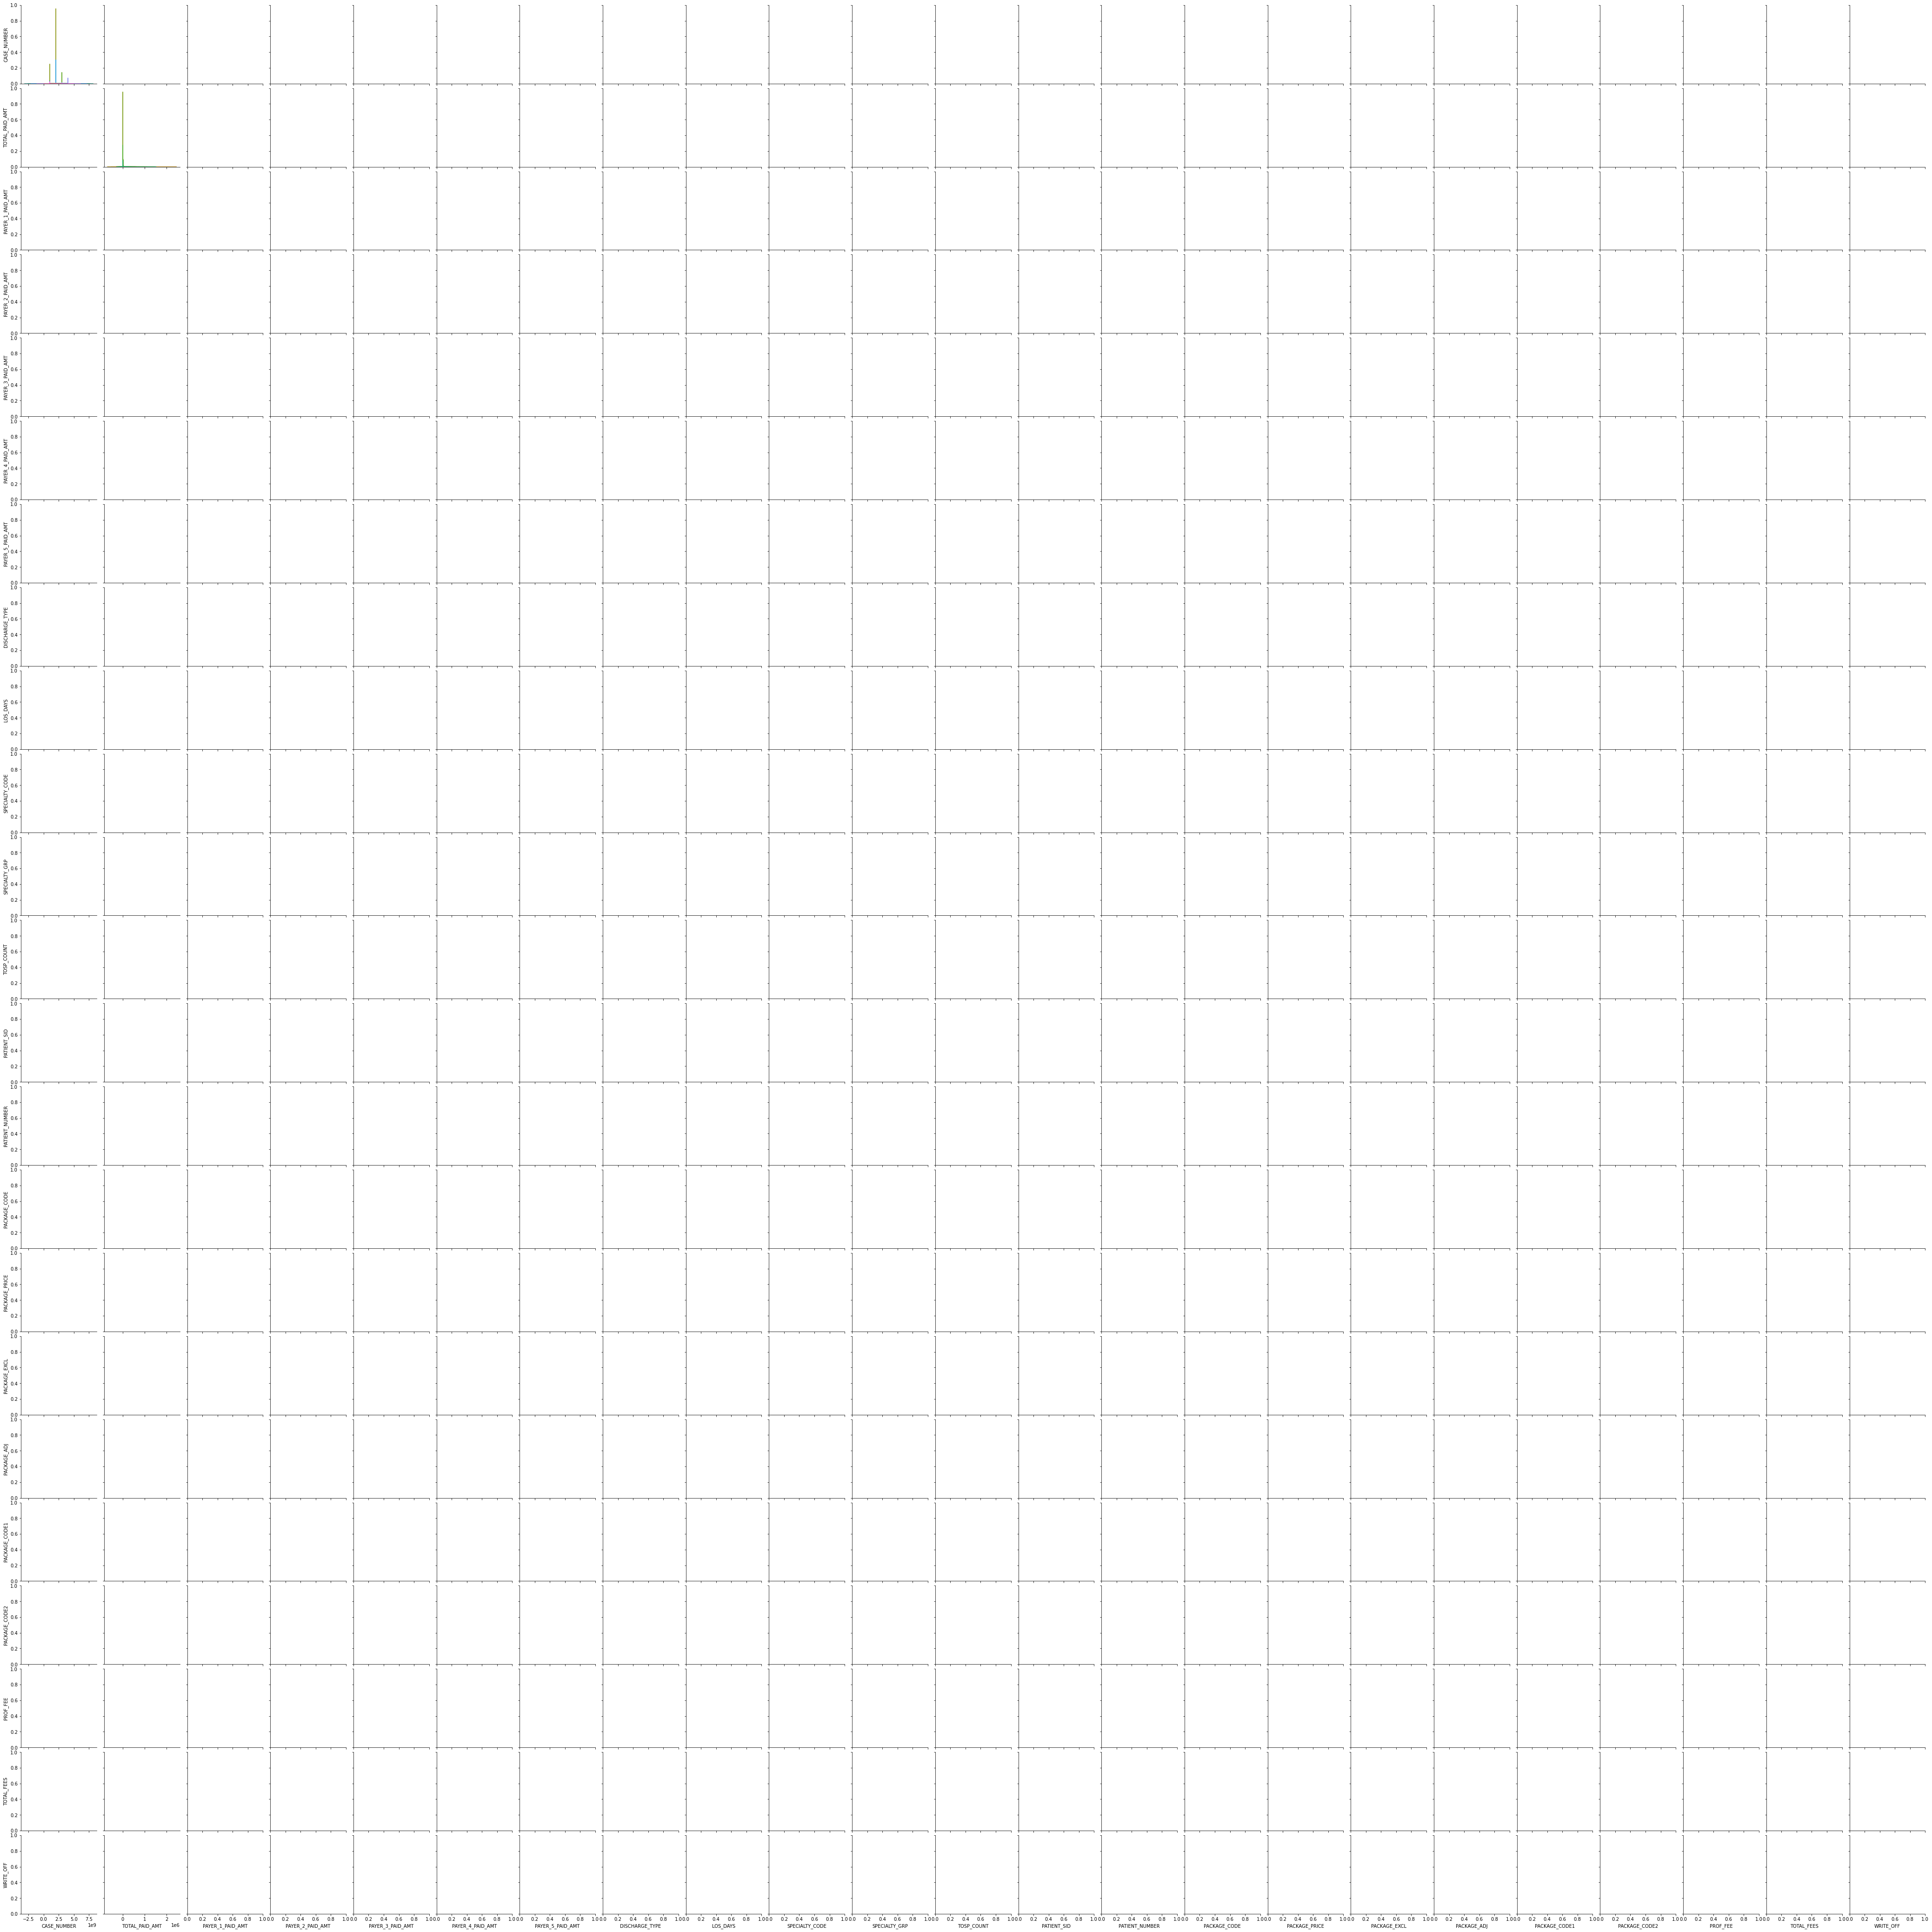

In [13]:
sns.pairplot(data=df1, vars=df.select_dtypes(include=np.number).columns, hue='WRITE_OFF')
plt.plot()

In [95]:
print(df.columns)
print(df.select_dtypes(include=np.float).columns)
print(df.select_dtypes(include=np.int64).columns)
print(df.select_dtypes(include=np.object).columns)

Index(['INSTITUTION', 'CASE_NUMBER', 'TOTAL_PAID_AMT', 'PAYER_CODE_1',
       'PAYER_NAME_1', 'PAYER_1_PAID_AMT', 'PAYER_CODE_2', 'PAYER_NAME_2',
       'PAYER_2_PAID_AMT', 'PAYER_CODE_3', 'PAYER_NAME_3', 'PAYER_3_PAID_AMT',
       'PAYER_CODE_4', 'PAYER_NAME_4', 'PAYER_4_PAID_AMT', 'PAYER_CODE_5',
       'PAYER_NAME_5', 'PAYER_5_PAID_AMT', 'CASE_TYPE', 'BED_TYPE',
       'REFERRAL_TYPE', 'TREATMENT_CATEGORY', 'ADMISSION_DTE',
       'ADMISSION_TYPE', 'DISCHARGE_DTE', 'DISCHARGE_TYPE',
       'DISCHARGE_TYPE_DESC', 'LOS_DAYS', 'DOCTOR_CODE', 'DOCTOR_NAME',
       'SPECIALTY_CODE', 'SPECIALTY_DESC', 'SPECIALTY_GRP', 'TOSP_COUNT',
       'TOSP_STRING', 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4', 'TOSP_DESC1',
       'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', 'NATIONALITY', 'RESID_CTY',
       'RESID_POSTALCODE', 'DOB', 'NONRESID_FLAG', 'PATIENT_SID',
       'PATIENT_NUMBER', 'GENDER', 'DECEASED_FLAG', 'MARITAL_STATUS',
       'RELIGION', 'LANGUAGE', 'VIP_FLAG', 'RACE', 'DRG_CODE', 'DRG_DESC

In [97]:
df = df.astype({'SPECIALTY_CODE': 'object', 'SPECIALTY_GRP': 'object', 'PACKAGE_CODE': 'object', 'PACKAGE_CODE1': 'object', 'PACKAGE_CODE2': 'object'})
print(df.select_dtypes(include=np.float).columns)

Index(['TOTAL_PAID_AMT', 'PAYER_1_PAID_AMT', 'PAYER_2_PAID_AMT',
       'PAYER_3_PAID_AMT', 'PAYER_4_PAID_AMT', 'PAYER_5_PAID_AMT',
       'PACKAGE_PRICE', 'PACKAGE_EXCL', 'PACKAGE_ADJ', 'PROF_FEE',
       'TOTAL_FEES', 'WRITE_OFF'],
      dtype='object')


In [98]:
# check 'PAYER_CODE_1' vs 'PAYER_NAME_1', 'PAYER_CODE_2' vs 'PAYER_NAME_2', 
# 'PAYER_CODE_3' vs 'PAYER_NAME_3', 'PAYER_CODE_4' vs 'PAYER_NAME_4',
# 'PAYER_CODE_5' vs 'PAYER_NAME_5'
print('PAYER_CODE_1 vs PAYER_NAME_1: ',
      df.groupby(by=['PAYER_CODE_1'])['PAYER_NAME_1'].nunique().max())
print('PAYER_CODE_2 vs PAYER_NAME_2: ',
      df.groupby(by=['PAYER_CODE_2'])['PAYER_NAME_2'].nunique().max())
print('PAYER_CODE_3 vs PAYER_NAME_3: ',
      df.groupby(by=['PAYER_CODE_3'])['PAYER_NAME_3'].nunique().max())
print('PAYER_CODE_4 vs PAYER_NAME_4: ',
      df.groupby(by=['PAYER_CODE_4'])['PAYER_NAME_4'].nunique().max())
print('PAYER_CODE_5 vs PAYER_NAME_5: ',
      df.groupby(by=['PAYER_CODE_5'])['PAYER_NAME_5'].nunique().max())

# check 'SPECIALTY_CODE' vs 'SPECIALTY_DESC' vs 'SPECIALTY_GRP'
print('SPECIALTY_CODE vs SPECIALTY_DESC: ',
      df.groupby(by=['SPECIALTY_CODE'])['SPECIALTY_DESC'].nunique().max())
print('SPECIALTY_DESC vs SPECIALTY_GRP: ',
      df.groupby(by=['SPECIALTY_DESC'])['SPECIALTY_GRP'].nunique().max())
print('SPECIALTY_CODE vs SPECIALTY_GRP: ',
      df.groupby(by=['SPECIALTY_CODE'])['SPECIALTY_GRP'].nunique().max())

# check 'DISCHARGE_TYPE' vs 'DISCHARGE_TYPE_DESC'
print('DISCHARGE_TYPE vs DISCHARGE_TYPE_DESC: ',
      df.groupby(by=['DISCHARGE_TYPE'])['DISCHARGE_TYPE_DESC'].nunique().max())

# check 'DOCTOR_CODE' vs 'DOCTOR_NAME'
print('DOCTOR_CODE vs DOCTOR_NAME: ',
      df.groupby(by=['DOCTOR_CODE'])['DOCTOR_NAME'].nunique().max())

# check 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4' vs 'TOSP_STRING'
# check 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE3', 'TOSP_CODE4' vs 'TOSP_STRING'
# check 'TOSP_CODE1' vs 'TOSP_DESC1', 'TOSP_CODE2' vs 'TOSP_DESC2', 'TOSP_CODE3' vs 'TOSP_DESC3', 'TOSP_CODE4' vs 'TOSP_DESC4'
print('TOSP_DESC1, TOSP_DESC2, TOSP_DESC3, TOSP_DESC4 vs TOSP_STRING: ',
      df.groupby(by=['TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4'])['TOSP_STRING'].nunique().max())
print('TOSP_CODE1, TOSP_CODE2, TOSP_CODE3, TOSP_CODE4 vs TOSP_STRING: ',
      df.groupby(by=['TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4'])['TOSP_STRING'].nunique().max())
print('TOSP_CODE1 vs TOSP_DESC1: ',
      df.groupby(by=['TOSP_CODE1'])['TOSP_DESC1'].nunique().max())
print('TOSP_CODE2 vs TOSP_DESC2: ',
      df.groupby(by=['TOSP_CODE2'])['TOSP_DESC2'].nunique().max())
#print('TOSP_CODE3 vs TOSP_DESC3: ',
#      df.groupby(by=['TOSP_CODE3'])['TOSP_DESC3'].nunique().max())
print('TOSP_CODE4 vs TOSP_DESC4: ',
      df.groupby(by=['TOSP_CODE4'])['TOSP_DESC4'].nunique().max())

# check 'PATIENT_SID' vs 'PATIENT_NUMBER'
print('PATIENT_SID vs PATIENT_NUMBER: ',
      df.groupby(by=['PATIENT_SID'])['PATIENT_NUMBER'].nunique().max())

# check 'DRG_CODE' vs'DRG_DESC'
print('DRG_CODE vs DRG_DESC: ',
      df.groupby(by=['DRG_CODE'])['DRG_DESC'].nunique().max())

# check 'PAYER_CODE1_V' vs 'PAYER_NAME1_V', 'PAYER_CODE2_V' vs 'PAYER_NAME2_V',
# 'PAYER_CODE3_V' vs 'PAYER_NAME3_V', 'PAYER_CODE4_V' vs 'PAYER_NAME4_V'
print('PAYER_CODE1_V vs PAYER_NAME1_V: ',
      df.groupby(by=['PAYER_CODE1_V'])['PAYER_NAME1_V'].nunique().max())
print('PAYER_CODE2_V vs PAYER_NAME2_V: ',
      df.groupby(by=['PAYER_CODE2_V'])['PAYER_NAME2_V'].nunique().max())
print('PAYER_CODE3_V vs PAYER_NAME3_V: ',
      df.groupby(by=['PAYER_CODE3_V'])['PAYER_NAME3_V'].nunique().max())
print('PAYER_CODE4_V vs PAYER_NAME4_V: ',
      df.groupby(by=['PAYER_CODE4_V'])['PAYER_NAME4_V'].nunique().max())

# check 'PACKAGE_CODE' vs 'PACKAGE_DESC'
print('PACKAGE_CODE vs PACKAGE_DESC: ',
      df.groupby(by=['PACKAGE_CODE'])['PACKAGE_DESC'].nunique().max())

# check  'PACKAGE_CODE1', 'PACKAGE_CODE2' vs 'PACKAGE_CODE'
print('PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE: ',
      df.groupby(by=['PACKAGE_CODE1', 'PACKAGE_CODE2'])['PACKAGE_CODE'].nunique().max())

# check 'PACKAGE_CODE1' vs 'PACKAGE_DESC1', 'PACKAGE_CODE2' vs 'PACKAGE_DESC2'
print('PACKAGE_CODE1 vs PACKAGE_DESC1: ',
      df.groupby(by=['PACKAGE_CODE1'])['PACKAGE_DESC1'].nunique().max())
print('PACKAGE_CODE2 vs PACKAGE_DESC2: ',
      df.groupby(by=['PACKAGE_CODE2'])['PACKAGE_DESC2'].nunique().max())

# check 'ICD_CODE1', 'ICD_CODE2', 'ICD_CODE3' vs 'ICDCODE_STRING'
print('ICD_CODE1, ICD_CODE2, ICD_CODE3 vs ICDCODE_STRING: ',
      df.groupby(by=['ICD_CODE1', 'ICD_CODE2', 'ICD_CODE3'])['ICDCODE_STRING'].nunique().max())

PAYER_CODE_1 vs PAYER_NAME_1:  1
PAYER_CODE_2 vs PAYER_NAME_2:  1
PAYER_CODE_3 vs PAYER_NAME_3:  1
PAYER_CODE_4 vs PAYER_NAME_4:  1
PAYER_CODE_5 vs PAYER_NAME_5:  1
SPECIALTY_CODE vs SPECIALTY_DESC:  1
SPECIALTY_DESC vs SPECIALTY_GRP:  3924
SPECIALTY_CODE vs SPECIALTY_GRP:  3924
DISCHARGE_TYPE vs DISCHARGE_TYPE_DESC:  1
DOCTOR_CODE vs DOCTOR_NAME:  1
TOSP_DESC1, TOSP_DESC2, TOSP_DESC3, TOSP_DESC4 vs TOSP_STRING:  11
TOSP_CODE1, TOSP_CODE2, TOSP_CODE3, TOSP_CODE4 vs TOSP_STRING:  9
TOSP_CODE1 vs TOSP_DESC1:  1
TOSP_CODE2 vs TOSP_DESC2:  1
TOSP_CODE4 vs TOSP_DESC4:  1
PATIENT_SID vs PATIENT_NUMBER:  1
DRG_CODE vs DRG_DESC:  2
PAYER_CODE1_V vs PAYER_NAME1_V:  1
PAYER_CODE2_V vs PAYER_NAME2_V:  1
PAYER_CODE3_V vs PAYER_NAME3_V:  1
PAYER_CODE4_V vs PAYER_NAME4_V:  1
PACKAGE_CODE vs PACKAGE_DESC:  2
PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE:  2
PACKAGE_CODE1 vs PACKAGE_DESC1:  2
PACKAGE_CODE2 vs PACKAGE_DESC2:  1
ICD_CODE1, ICD_CODE2, ICD_CODE3 vs ICDCODE_STRING:  1


In [99]:
df_check = df.groupby(by=['TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4'])['TOSP_STRING'].unique()
print(df_check.index[0], df_check[0], '\n')

print(df[['PATIENT_SID', 'PATIENT_NUMBER']].head(), '\n')

print('Check DRG_CODE vs DRG_DESC 2 values:')
df_check1 = df.groupby(by=['DRG_CODE'])['DRG_DESC'].unique()
print(df_check1[df_check1.map(len) > 1], '\n')

print('Check PACKAGE_CODE vs PACKAGE_DESC 2 values:')
df_check2 = df.groupby(by=['PACKAGE_CODE'])['PACKAGE_DESC'].unique()
df_check2_non_unique = df_check2[df_check2.map(len) > 1]
for row in df_check2_non_unique:
    print(row)
print('\n')

pd.options.display.float_format = '{:.0f}'.format
print('Check PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE 2 values:')
df_check3 = df.groupby(by=['PACKAGE_CODE1', 'PACKAGE_CODE2'])['PACKAGE_CODE'].unique()
print(df_check3[df_check3.map(len) > 1], '\n')

print('Check PACKAGE_CODE1 vs PACKAGE_DESC1 2 values:')
df_check4 = df.groupby(by=['PACKAGE_CODE1'])['PACKAGE_DESC1'].unique()
df_check4_non_unique = df_check4[df_check4.map(len) > 1]
for row in df_check4_non_unique:
    print(row)
print('\n')

('SA701B', 'SA704B', 'SI805C') ['SA701B ; SA704B ; SI700U ; SI805C'] 

   PATIENT_SID  PATIENT_NUMBER
0      1759191         5131029
1      2014024         5389489
2      1053670         4128742
3      1033331         4106106
4      2218131         5591095 

Check DRG_CODE vs DRG_DESC 2 values:
DRG_CODE
960Z    [UNGROUPABLE., UNGROUPABLE]
Name: DRG_DESC, dtype: object 

Check PACKAGE_CODE vs PACKAGE_DESC 2 values:
['SG_ROBOTIC PROSTATECTOMY_LOS3_CLASS A'
 'SG_ROBOTIC PROSTATECTOMY(3A)LOS3_CLASS A']
['SG_CATARACT_UNILATERAL_BDL_DS' 'SG_CATARACT_UNILATERAL_PAP_DS']
['TC_LIVER TRANSPLANT (REC)_LOS14(ICU2)_SG'
 'TC_LIVER TRANSPLANT(REC)_LOS14(ICU2)_SGL']


Check PACKAGE_CODE1, PACKAGE_CODE2 vs PACKAGE_CODE 2 values:
PACKAGE_CODE1  PACKAGE_CODE2
8001010201     8003020001       [8003020001.0, 8001010201.0]
Name: PACKAGE_CODE, dtype: object 

Check PACKAGE_CODE1 vs PACKAGE_DESC1 2 values:
['SG_ROBOTIC PROSTATECTOMY_LOS3_CLASS A'
 'SG_ROBOTIC PROSTATECTOMY(3A)LOS3_CLASS A']
['SG_CATARACT_UNILA

       DISCHARGE_DTE ADMISSION_DTE  len_stay  LOS_DAYS
0         2018-05-04    2018-05-01         3         3
1         2018-04-24    2018-04-24         0         0
2         2018-04-12    2018-04-11         1         1
3         2017-01-27    2017-01-26         1         1
4         2019-09-26    2019-09-26         0         0
...              ...           ...       ...       ...
381207    2020-01-03    2019-12-31         3         3
381208    2020-01-04    2019-12-31         4         4
381209    2020-01-06    2019-12-31         6         6
381210    2020-01-01    2019-12-31         1         1
381211    2020-01-01    2019-12-31         1         1

[381212 rows x 4 columns]


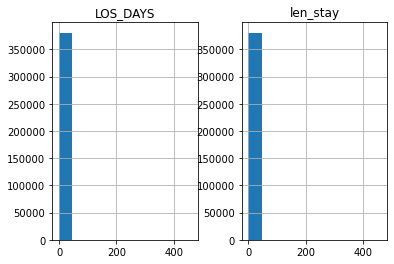

Days diff =  0


In [113]:
df['len_stay'] = (df['DISCHARGE_DTE']-df['ADMISSION_DTE']).dt.days
print(df[['DISCHARGE_DTE', 'ADMISSION_DTE','len_stay', 'LOS_DAYS']])
df[['LOS_DAYS', 'len_stay']].hist()
plt.show()
print('Days diff = ', (df['len_stay'] - df['LOS_DAYS']).sum())
df.drop('len_stay', axis=1, inplace=True)

In [120]:
print(df.groupby(by='RESID_CTY')['RESID_POSTALCODE'].nunique())

RESID_CTY
Angola                 1
Anguilla               1
Antigua/Barbuda        1
Argentina              1
Armenia                1
Australia             17
Austria                1
Bahrain                1
Bangladesh             8
Barbados               1
Belgium                1
Bermuda                1
Bhutan                 1
Botswana               1
Brazil                 1
Brunei Daruss.         5
Bulgaria               1
Cambodia               8
Cameroon               1
Canada                 1
Chile                  1
China                 15
Colombia               1
Croatia                1
Cyprus                 2
Czech Republic         1
Denmark                3
East Timor             1
Ecuador                1
Egypt                  1
El Salvador            1
Estonia                1
Ethiopia               1
Fiji                   1
Finland                1
France                 2
Germany                7
Greece                 1
Guam                   1
Guinea         

In [ ]:
# break up data into hospital 

# drop duplicate CASE_NUMBER
# set CASE_NUMBER as index
# drop columnns
drop_cols = ['PAYER_NAME_1', 'PAYER_NAME_2', 'PAYER_NAME_3', 'PAYER_NAME_4', 'PAYER_NAME_5',
             'DISCHARGE_DTE', 'DISCHARGE_TYPE_DESC',
             'DOCTOR_NAME', 'SPECIALTY_DESC',
             'TOSP_STRING', 'TOSP_CODE1', 'TOSP_CODE2', 'TOSP_CODE4', 'TOSP_DESC1', 'TOSP_DESC2', 'TOSP_DESC3', 'TOSP_DESC4', # to verify
             'RESID_CTY', 'RESID_POSTALCODE', # convert to latitude longitude
             'PATIENT_SID', 'PATIENT_NUMBER', 'DRG_DESC',
             'PAYER_NAME1_V', 'PAYER_NAME2_V', 'PAYER_NAME3_V', 'PAYER_NAME4_V',
             'PACKAGE_CODE', 'PACKAGE_DESC', 'PACKAGE_DESC1', 'PACKAGE_DESC2', 'ICDCODE_STRING']

### Sampling

In [5]:
# Get random sample
sample_frac = 0.1
np.random.seed(0)
sample_size = int(round(abs(sample_frac * df1.shape[0])))
print(sample_size)
sample_indices = np.random.choice(df1.shape[0], size=sample_size, replace=False)
print(len(sample_indices))
df1_sample = df1.iloc[sample_indices]
print(df1_sample.shape)

38121
38121
(38121, 62)


In [51]:
import random
import sys
from statistics import variance, mean, stdev

def get_best_sample(df, sample_frac=0.1):
    rand_tstats = {}
    rand_f_test = {}
    sample_size = int(round(abs(sample_frac * df.shape[0])))
    random.seed(0)
    rand_list = random.sample(range(2**32 - 1), 1000)
    for rand in rand_list:
        np.random.seed(rand)
        sample_indices = np.random.choice(df.shape[0], size=sample_size, replace=False)
        df_sample = df.iloc[sample_indices]
        tstats = []
        f_tests=[]
        for col in df.columns:
            var_df = df[col].std()**2
            var_df_sample = df_sample[col].std()**2
            
            if (var_df != 0) or (var_df_sample != 0):
                tstats.append(abs((df[col].mean() - df_sample[col].mean()) / ((var_df / len(df[col])) + (var_df_sample / len(df_sample[col])))**0.5))
            else:
                tstats.append(0.0)

            if var_df_sample != 0:
                f_test = var_df / var_df_sample
            else:
                f_test = 1.0    
            f_tests.append(abs(1-f_test))

        max_tstats = max(tstats)
        max_f_test = max(f_tests)
        #print(rand, max_tstats, max_f_test)
        rand_tstats[rand] = max_tstats
        rand_f_test[rand] = max_f_test

    #print(min(rand_tstats, key=rand_tstats.get))
    #print(min(rand_f_test, key=rand_f_test.get))

    mean_tstats = mean(rand_tstats.values())
    std_tstats = stdev(rand_tstats.values())
    #print(mean_tstats, var_tstats)
    mean_f_test = mean(rand_f_test.values())
    std_f_test = stdev(rand_f_test.values())
    #print(mean_f_test, var_f_test)
    #std_rand_tstats = {key : abs(value - mean_tstats) / std_tstats for (key, value) in rand_tstats.items()}
    #std_rand_f_test = {key : abs(value - mean_f_test) / std_f_test for (key, value) in rand_f_test.items()}
    #std_rand_tstats_f_test = {key : ((value + std_rand_f_test[key]) / 2) for (key, value) in std_rand_tstats.items()}
    #std_rand_tstats_f_test_ms = {key : ((value**2 + std_rand_f_test[key]**2) / 2)**0.5 for (key, value) in std_rand_tstats.items()}
    std_rand_tstats_f_test_ms = {key : 
                                 (((abs(value - mean_tstats) / std_tstats) ** 2 
                                   + (abs(std_rand_f_test[key] - mean_f_test) / std_f_test) ** 2) / 2) ** 0.5 
                                 for (key, value) in std_rand_tstats.items()}
    #min_key = min(std_rand_tstats, key=std_rand_tstats.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key])
    #min_key = min(std_rand_f_test, key=std_rand_f_test.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key])
    #min_key = min(std_rand_tstats_f_test, key=std_rand_tstats_f_test.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key], std_rand_tstats_f_test[min_key])
    min_key = min(std_rand_tstats_f_test_ms, key=std_rand_tstats_f_test_ms.get)
    #print(min_key, std_rand_tstats[min_key], std_rand_f_test[min_key], std_rand_tstats_f_test[min_key], std_rand_tstats_f_test_ms[min_key])
    print(min_key, std_rand_tstats_f_test_ms[min_key])
    
    np.random.seed(min_key)
    sample_indices = np.random.choice(df.shape[0], size=sample_size, replace=False)
    return df.iloc[sample_indices]

df_sample1 = get_best_sample(df1, sample_frac=0.1)
print(df_sample1.shape)

87583 0.0771278048324297
(38121, 62)


In [52]:
df_sample1 = get_best_sample(df1, sample_frac=0.1)
print(df_sample1.shape)

87583 0.0771278048324297
(38121, 62)


### Feature Engineering

In [118]:
# Aggregate 'Admission_Age' using 'ADMISSION_DTE', 'DOB'
print(df['DOB'].head())
df['Admission_Age'] = df['ADMISSION_DTE'].dt.year-df['DOB'].dt.year
print(df[['ADMISSION_DTE', 'DOB','Admission_Age']])

0   1980-12-25
1   1951-10-26
2   1948-06-06
3   1980-01-23
4   1972-05-25
Name: DOB, dtype: datetime64[ns]
       ADMISSION_DTE        DOB  Admission_Age
0         2018-05-01 1980-12-25             38
1         2018-04-24 1951-10-26             67
2         2018-04-11 1948-06-06             70
3         2017-01-26 1980-01-23             37
4         2019-09-26 1972-05-25             47
...              ...        ...            ...
381207    2019-12-31 1964-10-29             55
381208    2019-12-31 1982-07-28             37
381209    2019-12-31 1937-07-16             82
381210    2019-12-31 1964-06-13             55
381211    2019-12-31 2015-12-23              4

[381212 rows x 3 columns]


In [ ]:
# drop columnns
drop_cols2 = ['ADMISSION_DTE', 'DOB']

### Preprocessing

### Training

### Validation